# Plot the data
Read the file ["Readme.ipynb"](Readme.ipynb) for more information.

## Modules
Needed to use non-Python functionalities already programmed by someone else.

In [1]:
# Used to cast the polygons into np.arrays and afterwards transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox
# Used to navigate the directories and check for files
import os
# backup directory of this file, because the working directory is changed to save files
accumulation_of_incidences_districts_directory = os.getcwd()

## Get the Data
Read the file ["Readme.ipynb"](Readme.ipynb) or check out the files ["get_data.ipynb"](get_data.ipynb) and ["get_geographical_data_of_german_counties.ipynb"](get_geographical_data_of_german_counties.ipynb) for more information about the data collection.

In [2]:
os.chdir("..")   # move one directory up
%run color_scheme.ipynb
os.chdir("collect_data")   # move to the cllect_data directory
%run get_data.ipynb
os.chdir(accumulation_of_incidences_districts_directory)    # return to original directory

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!


## Plot the Distribution of the Incidences in Germany

C:\Users\leand\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


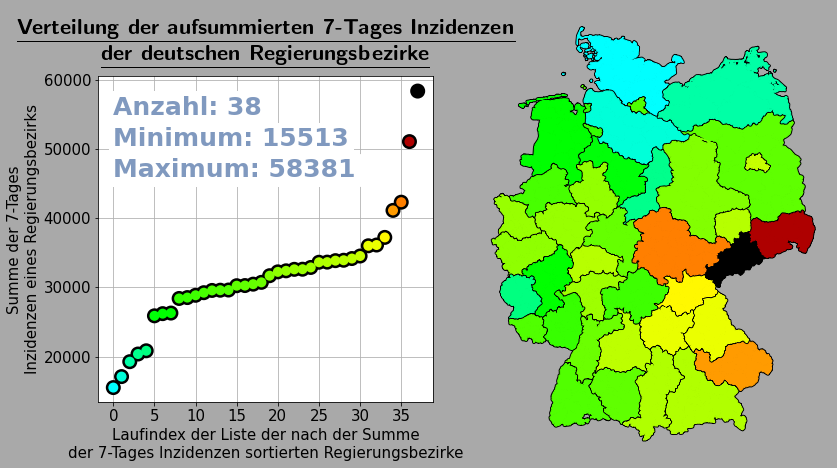

In [4]:
plt.figure(figsize=(6, 6), facecolor='darkgrey')    # enlarge plot
incidences_of_districts_acc = dict()
for districtId, district in districts.items():
    incidences_of_districts_acc[districtId] = sum(district["incidences"])
incidences_sums_copy = list(incidences_of_districts_acc.values()).copy()
incidences_sums_copy.sort()

plt.text(0, 55000, "Anzahl: " + str(len(incidences_sums_copy)),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75),
        backgroundcolor='w')
plt.text(0, 50500, "Minimum: " + str(int(incidences_sums_copy[0])),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75),
        backgroundcolor='w')
plt.text(0, 46000, "Maximum: " + str(int(incidences_sums_copy[-1])),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75),
        backgroundcolor='w')
plt.title(r"\textbf{\underline{Verteilung der aufsummierten 7-Tages Inzidenzen}}"+"\n"+
          r"\textbf{\underline{der deutschen Regierungsbezirke}}",
         fontsize=22, y=1.03, usetex=True)
plt.ylabel("Summe der 7-Tages\nInzidenzen eines Regierungsbezirks",
         fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Laufindex der Liste der nach der Summe\n"+
           "der 7-Tages Inzidenzen sortierten Regierungsbezirke", fontsize=15)
plt.xticks(fontsize=15)
plt.grid()

colors = list()
for incidences_sum in incidences_sums_copy:
    colors.append(color_scheme(incidences_sum, incidences_sums_copy))
# plot everything twice: once with black edges - once without
x=[i for i in range(len(incidences_sums_copy))]
y=incidences_sums_copy
edges=(["black" for i in range(len(y))]+[(0,0,0,0) for i in range(len(y))])
plt.scatter(x+x,y+y, color=colors+colors, zorder=2, s=100,
            linewidth=5, edgecolors=edges)

ax = plt.axes([1, -0.01, 0.82, 1.05], frameon=False) # [left, bottom, width, height]
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('darkgrey')
i=0
for districtId, incidences_sum in incidences_of_districts_acc.items():
    for AdmUnitId in districts[districtId]["counties"]:
        for polygon in counties_geography[AdmUnitId]['raw_geometry']:
            x,y = np.array(polygon).T
            ax.plot(x, y, linewidth=3, color="black", zorder=i+2)
        for polygon in counties_geography[AdmUnitId]['geometry']:
            x,y = np.array(polygon).T
            ax.fill(x, y, zorder=i+3, color=color_scheme(
                incidences_sum, incidences_sums_copy))
    i+=1

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Ergebnisse")): os.makedirs("results/Ergebnisse")
plt.savefig("results/Ergebnisse/accumulation_incidences_districts.png",
            facecolor="darkgrey", bbox_inches=Bbox([[-0.95,-0.2],[11,6.3]]))
os.chdir(accumulation_of_incidences_districts_directory)    # return to original directory